In [0]:
import numpy as np
import pandas as pd

In [0]:
from google.colab import files

In [0]:
uploaded = files.upload()

Saving x.csv to x.csv


In [0]:
import io

In [0]:
X = pd.read_csv(io.BytesIO(uploaded['x.csv']))

In [0]:
Y = X['worldwide_gross']

In [0]:
X = X.drop('worldwide_gross', axis=1)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4)

In [0]:
print(len(X))
print(len(X_train))
print(len(X_test))

4104
2462
1642


In [0]:
X.head(1)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9,760505847.0


In [0]:
from sklearn.linear_model import Lasso

model = Lasso()

In [0]:
model.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
predicted = model.predict(X_test)

In [0]:
predicted.shape

(1642,)

(array([[1.048e+03, 5.210e+02, 4.300e+01, 2.400e+01, 4.000e+00, 1.000e+00,
         0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00],
        [1.144e+03, 4.170e+02, 4.500e+01, 2.600e+01, 7.000e+00, 1.000e+00,
         1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]]),
 array([-2.20586968e+08,  7.98636270e+07,  3.80314222e+08,  6.80764817e+08,
         9.81215412e+08,  1.28166601e+09,  1.58211660e+09,  1.88256720e+09,
         2.18301779e+09,  2.48346839e+09,  2.78391898e+09]),
 <a list of 2 Lists of Patches objects>)

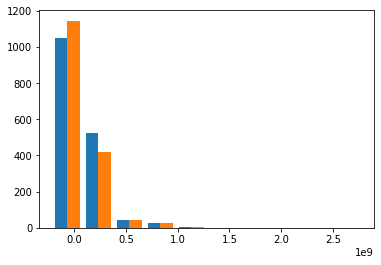

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([predicted,Y_test])

In [0]:
model.score(X_test, Y_test)

0.8644558823824923

In [0]:
residuals = Y_test - predicted

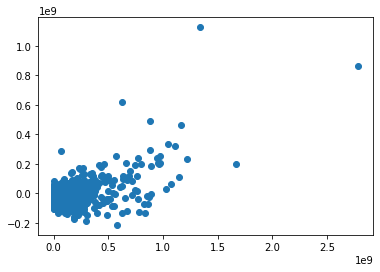

In [0]:
plt.scatter(Y_test, residuals)

In [0]:
ap_residuals =  np.abs(residuals) / Y_test

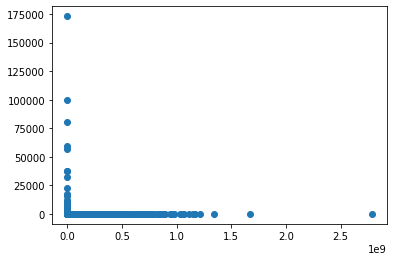

In [0]:
plt.scatter(Y_test, ap_residuals)

In [0]:
lap_residuals = np.log(ap_residuals)

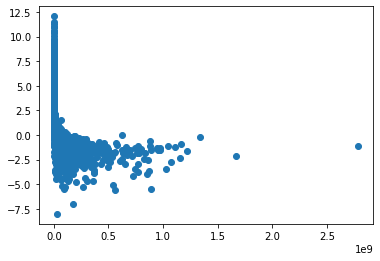

In [0]:
plt.scatter(Y_test, lap_residuals)

AttributeError: ignored

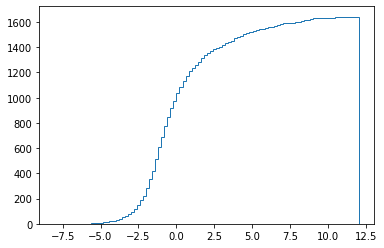

In [0]:
plt.hist(lap_residuals, bins=100, normed=1, histtype='step', cumulative=True)

AttributeError: ignored

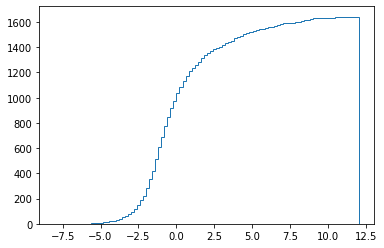

In [0]:
plt.hist(lap_residuals, bins=100, normed=1, histtype='step', cumulative=True)
plt.axis([-2, 0, 0, 1])
np.power(np.exp(1)*np.ones(5), np.linspace(-2,0,5))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


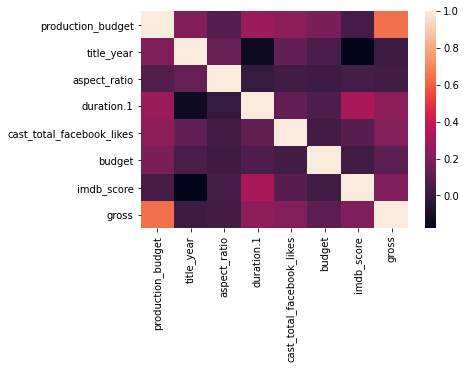

In [0]:
import seaborn as sns
%matplotlib inline
sns.heatmap(X.corr())